In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls ./drive/MyDrive/Colab_Notebooks/Annotated-Transformer-English-to-Chinese-Translator-master/document/images

alignment.png		    LSTM_output_gate.png
attention_eg_cat_milk.png   LSTM_state_line.png
attention_mask.png	    LSTM_structure.png
attention_matrix.png	    LSTM_update_state.png
attention_mechanism_01.png  MonaLisa.png
attention_mechanism_02.png  multilayer_rnn.png
attention_recipe.png	    other_attention_mechanism.png
decoder.png		    pe_lines.png
diff_ways_rnn.png	    pe.png
eating_apple_eg.png	    residue_connection.png
encoder_decoder_model.png   RNN_applications.png
encoder.png		    RNN_as_NN.png
English-to-Chinese.png	    RNN_language_mode.png
feed_forward_example.png    RNN_rolled_eg.png
google_paper.png	    self-attention.png
google_translate.png	    seq_to_seq_training.png
Intuition_Attention.png     seq_to_seq_w_wo_attention.png
labelsmooth_line.png	    sequence_eg.png
labelsmooth.png		    sub-mask.png
LSTM3-SimpleRNN.png	    types_of_attention.png
LSTM_forget_gate.png	    Understand_How_Transformer_Work.png
LSTM_input.png		    warmup_lrate.png
LSTM_legend.png


In [ ]:
!ls ./
!pwd
#!ls ~

drive  sample_data
/content


In [ ]:
#mydir_zhe =  "Colab\ Notebooks/Annotated-Transformer-English-to-Chinese-Translator-master"
mydir_zhongyi =  "Colab_Notebooks/Annotated-Transformer-English-to-Chinese-Translator-master"

import os
os.getcwd()
os.chdir("./drive/MyDrive/"+mydir_zhongyi)

#os.chdir("./drive/MyDrive/"+mydir_zhe)
#os.getcwd()
#!cd ./drive/MyDrive/Colab\ Notebooks/Annotated-Transformer-English-to-Chinese-Translator-master
#!ls ./Colab_Notebooks/Annotated-Transformer-English-to-Chinese-Translator-master
#!ls ./drive/MyDrive/




In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def showimage(imdir,figsize_):
  img = cv2.imread(imdir)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig,ax = plt.subplots(figsize=figsize_)
  ax.imshow(img_cvt)
  plt.show()

# Embedding

Find a mapping between English words into Euclidean Space such that both semantics and syntax patterns are preserved.

Outstanding Models including **Word2Vec** and **GloVe**.

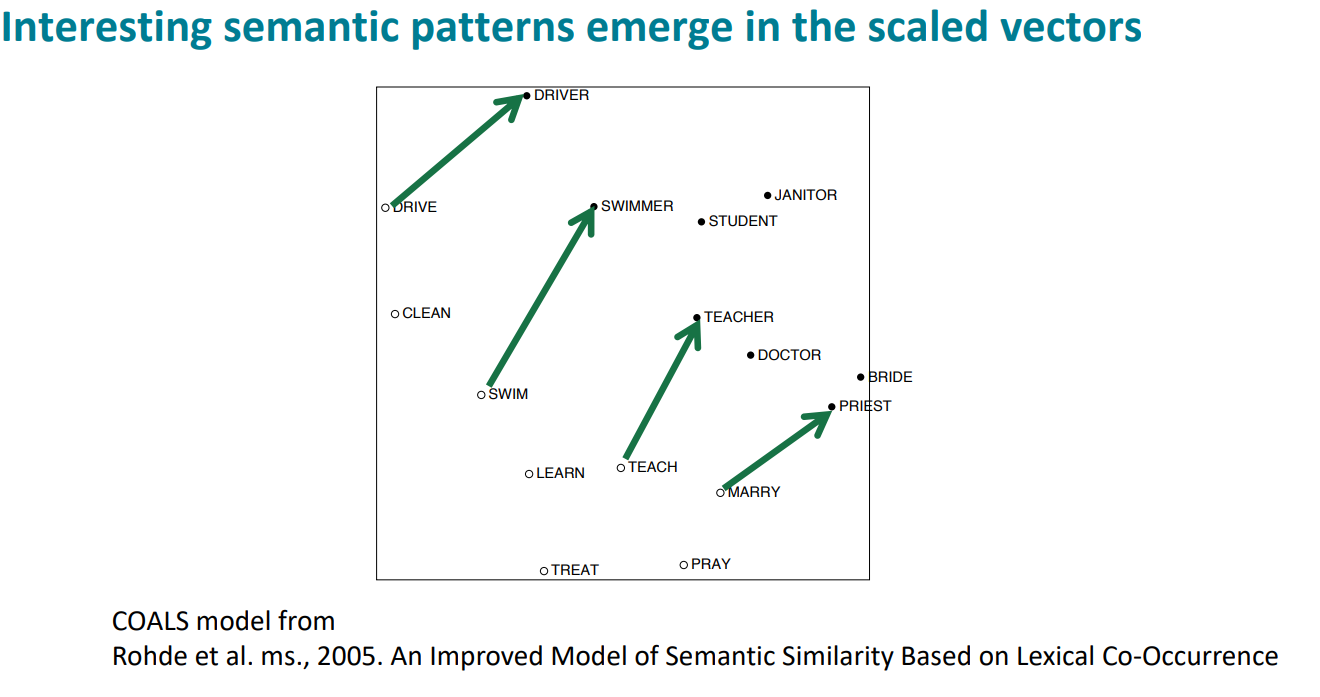

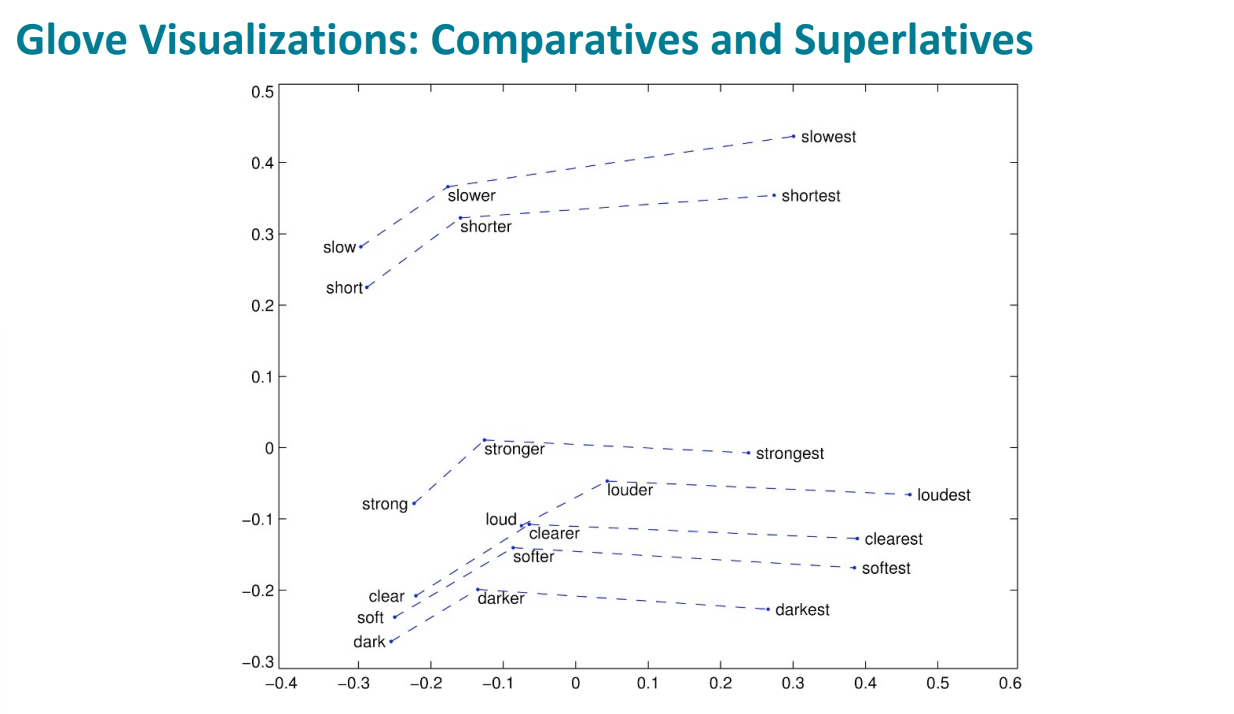



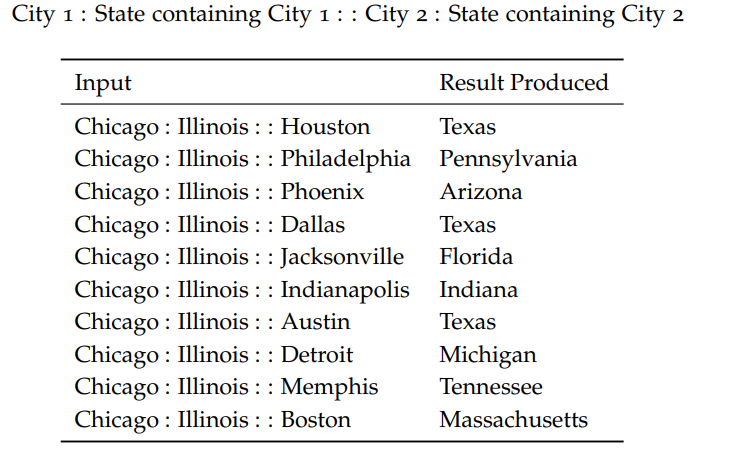

# Traditional neural network vs recurrent neural network (RNN)

- Traditional neural network consists of input, hidden, and output layers. 
- The layers of the network are connected through weight matrices. 
- We use forward propagation to calculate the output value (scalar or vector), and use backpropagation to obtain 
  (train) the weights of the matrices. 
- It is widely used but has disadvantage when dealing with sequence data. 

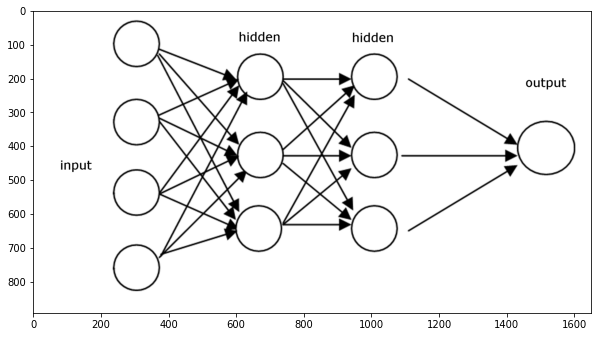

In [ ]:
showimage("./document/images/feed_forward_example.png", (10, 8))

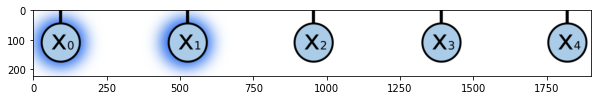

In [ ]:
showimage("./document/images/sequence_eg.png", (10, 8))

Recurrent neural networks (RNN) address this issue. 

RNN can be regarded as a special type of neural networks. RNN consists of a hidden layer that is reused for the next time step. <br>

<br>

$\displaystyle h_t = f(h_{t - 1}, \, x_t)$

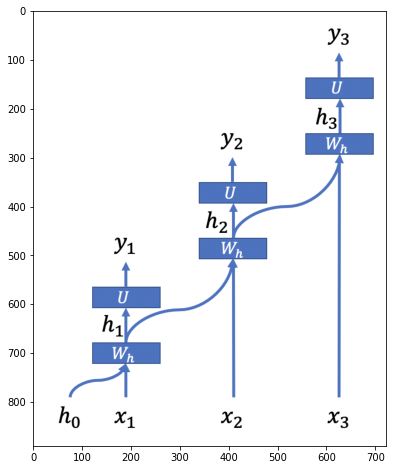

In [ ]:
showimage("./document/images/RNN_as_NN.png", (10, 8))

RNN can be viewed as nerual networks with loops in them. They are networks with loops in them, allowing information to persist.

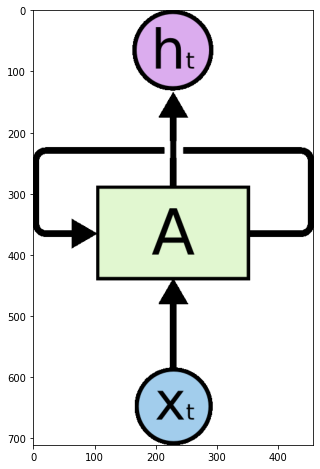

In [ ]:
showimage("./document/images/RNN_rolled_eg.png", (10, 8))

# Standard RNN (recurrent neural network)

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

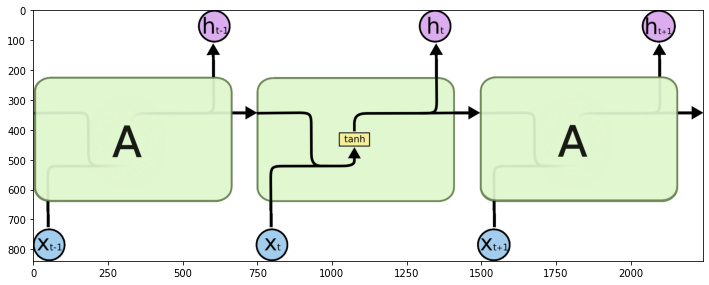

In [ ]:
showimage("./document/images/LSTM3-SimpleRNN.png", (12, 10))

Suppose we want to predict the next word in a sentense using RNN. 

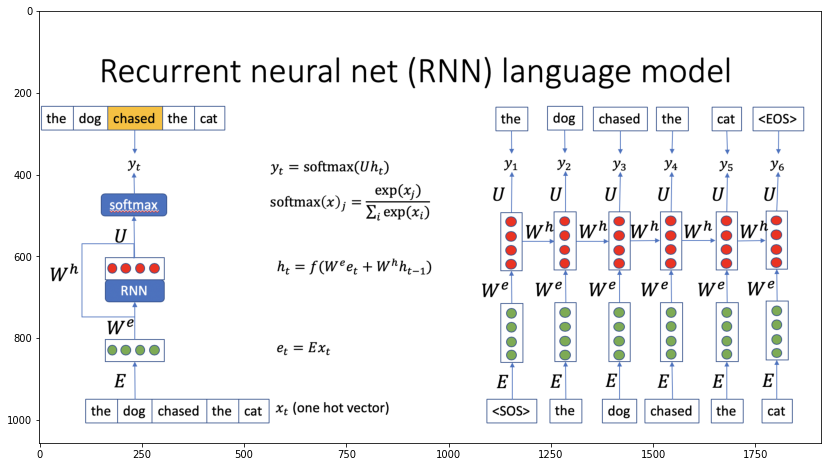

In [ ]:
showimage("./document/images/RNN_language_mode.png", (14, 12))

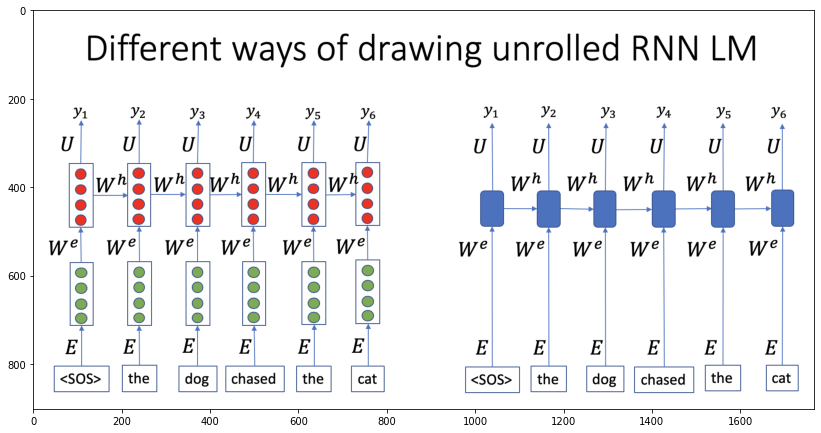

In [ ]:
showimage("./document/images/diff_ways_rnn.png", (14, 12))

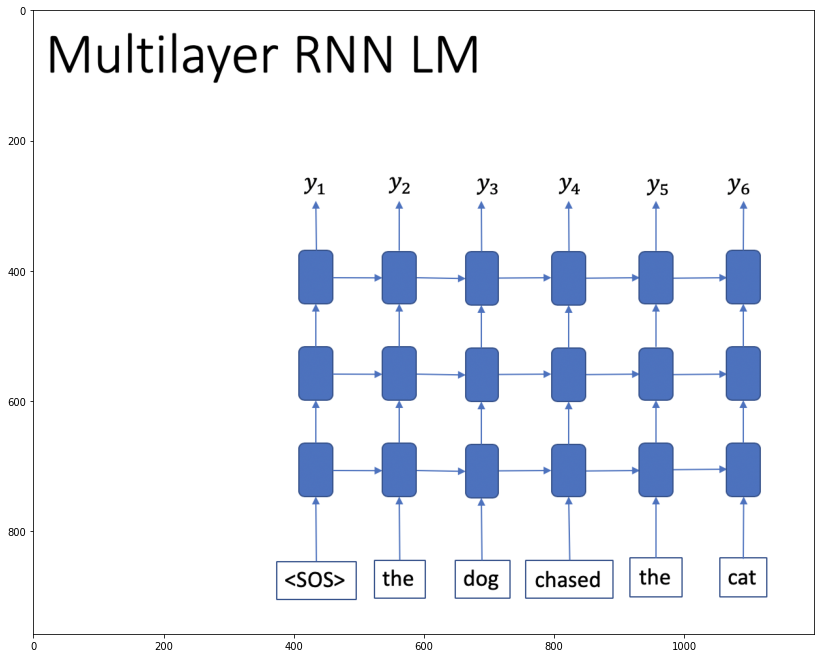

In [ ]:
showimage("./document/images/multilayer_rnn.png", (14, 12))

## LSTM - special type of RNN

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

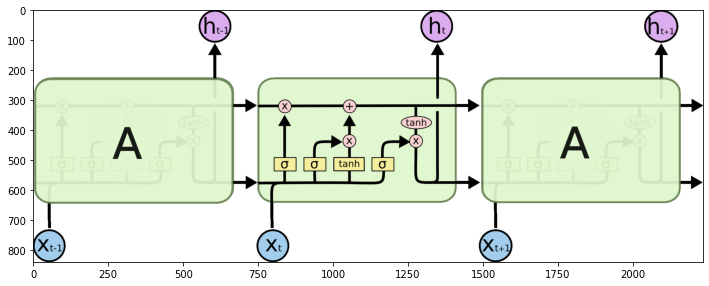

In [ ]:
showimage("./document/images/LSTM_structure.png", (12, 10))

### details of LSTM - three gates

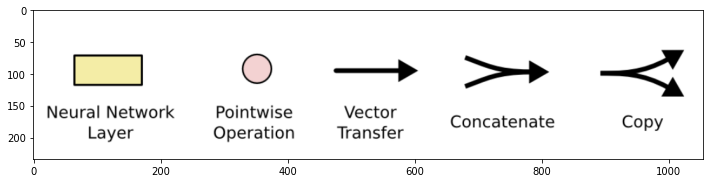

In [13]:
showimage("./document/images/LSTM_legend.png", (12, 10))

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

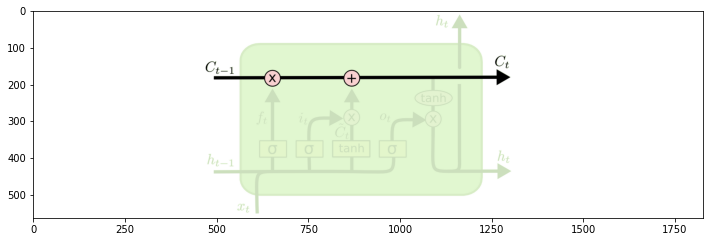

In [ ]:
showimage("./document/images/LSTM_state_line.png", (12, 10))

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at $h_{t-1}$ and $x_t$, and outputs a number between $0$ and $1$ for each number in the cell state $C_{t-1}$. A $1$ represents “completely keep this” while a $0$ represents “completely get rid of this.”

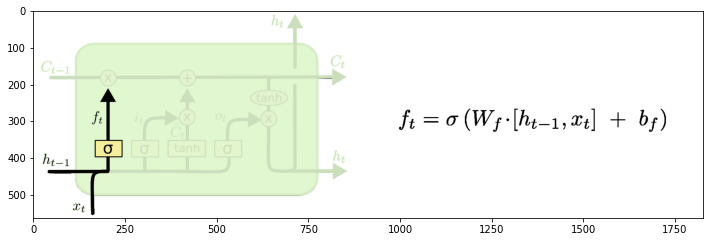

In [ ]:
showimage("./document/images/LSTM_forget_gate.png", (12, 10))

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, $\tilde{C}_t$, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

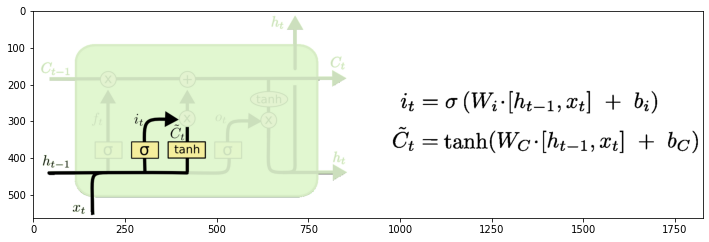

In [ ]:
showimage("./document/images/LSTM_input.png", (12, 10))

It’s now time to update the old cell state, $C_{t-1}$, into the new cell state $C_t$. The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by $f_t$, forgetting the things we decided to forget earlier. Then we add $i_t*\tilde{C}_t$. This is the new candidate values, scaled by how much we decided to update each state value.

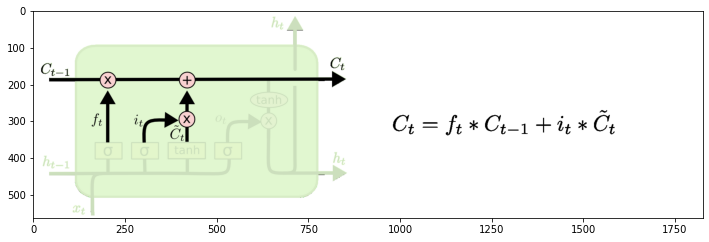

In [ ]:
showimage("./document/images/LSTM_update_state.png", (12, 10))

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through $\tanh$ (to push the values to be between $-1$ and $1$ and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

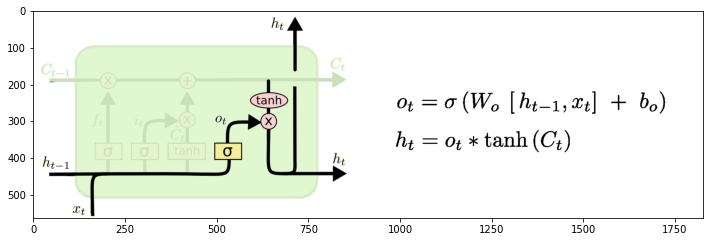

In [ ]:
showimage("./document/images/LSTM_output_gate.png", (12, 10))

## Applications of RNNs

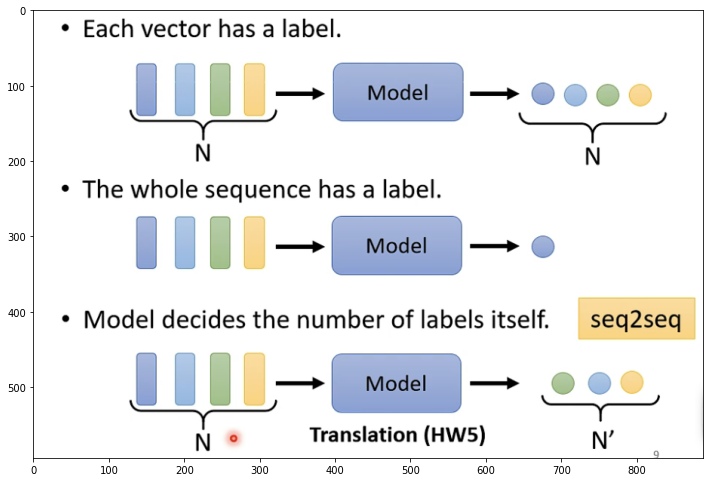

In [ ]:
showimage("./document/images/RNN_applications.png", (12, 10))

# Sequence to sequence task

- When coming to tasks like translation where we need to predict a sequence (of variable length) given a sequence (of variable length), simple RNNs run into problems. 

$input: (x_1, \, x_2, \, x_3)$ $\rightarrow$ $output: (y_1, \, y_2, \, y_3, \, y_4, \, y_5)$, say language tranlation.

- This is where encoder-decoder models come into play.

## Encoder-decoder: consists of two parts, <font color=blue>encoder part </font>  and <font color=green>decoder part

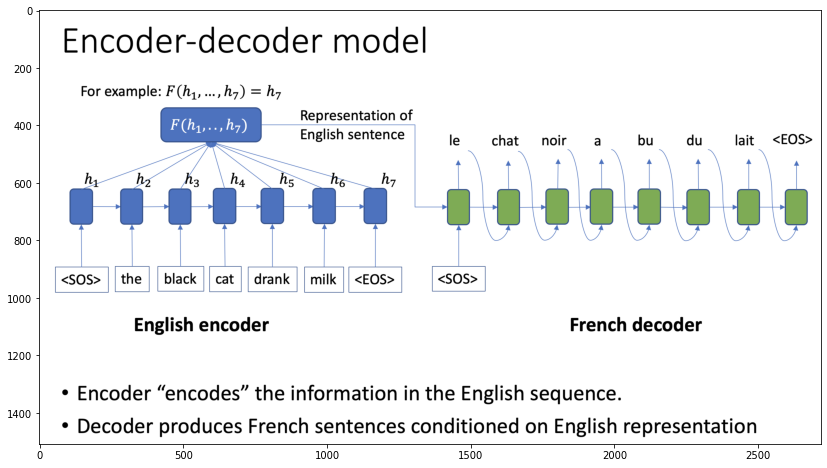

In [ ]:
showimage("./document/images/encoder_decoder_model.png", (14, 12))

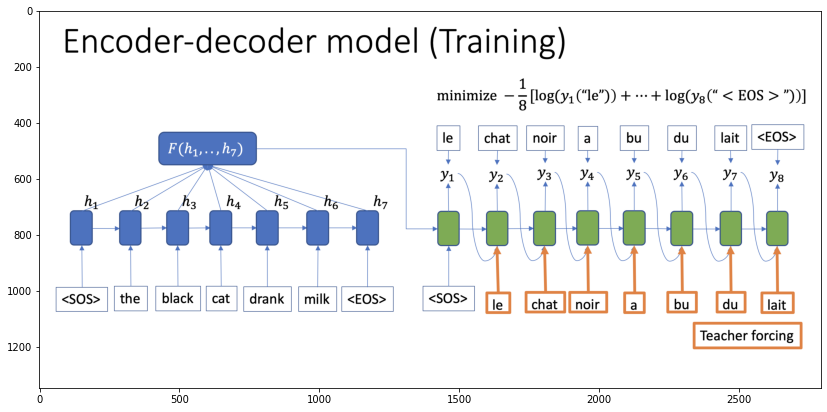

In [ ]:
showimage("./document/images/seq_to_seq_training.png", (14, 12))

## Problems with simple encoder-decoder models

- Each time step depends on the same encoder embedding

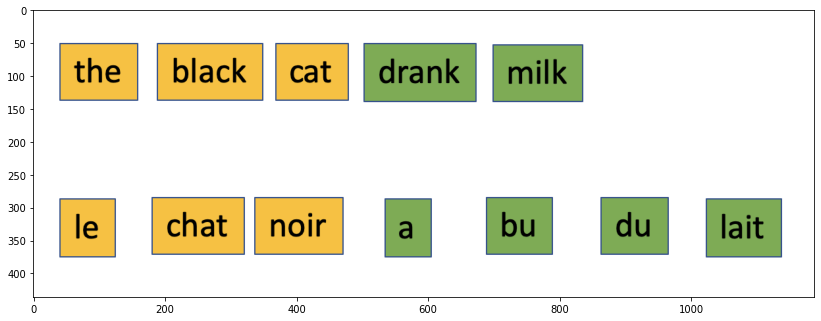

In [ ]:
showimage("./document/images/attention_eg_cat_milk.png", (14, 12))

Attention is introduced to solve this issue.
- Attention in a nutshell: correlation (importance) weights

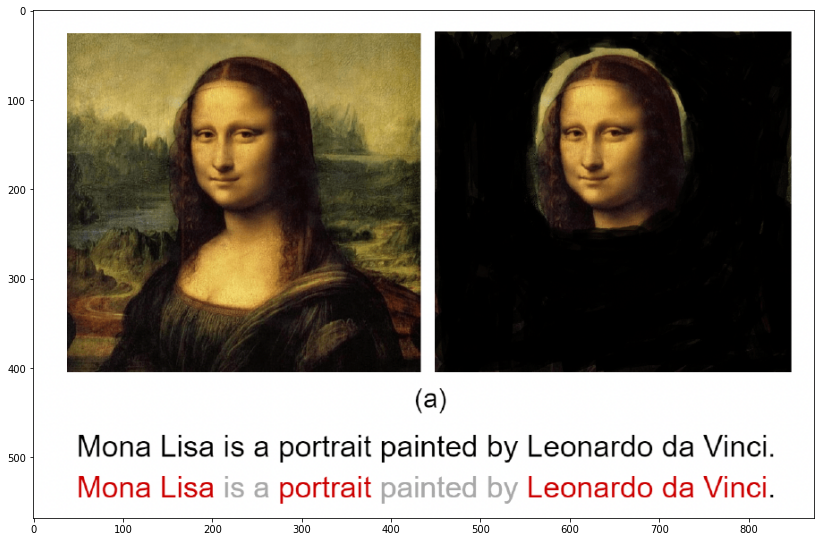

In [ ]:
showimage("./document/images/MonaLisa.png", (14, 12))

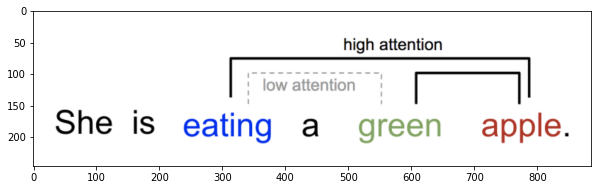

In [ ]:
showimage("./document/images/eating_apple_eg.png", (10, 8))

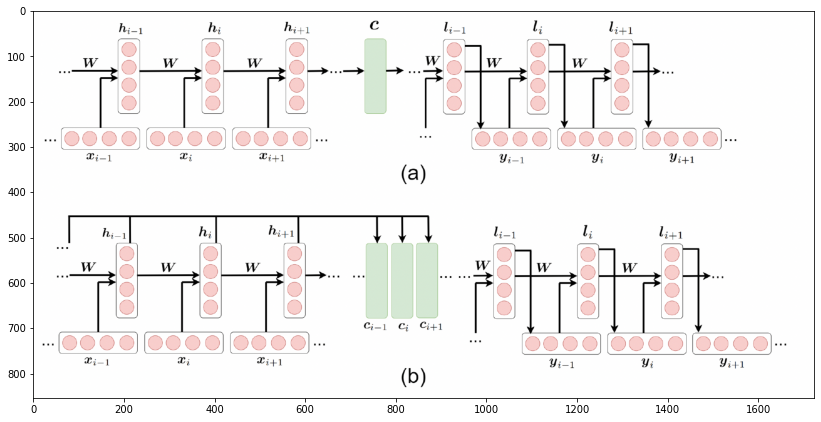

In [ ]:
showimage("./document/images/seq_to_seq_w_wo_attention.png", (14, 12))

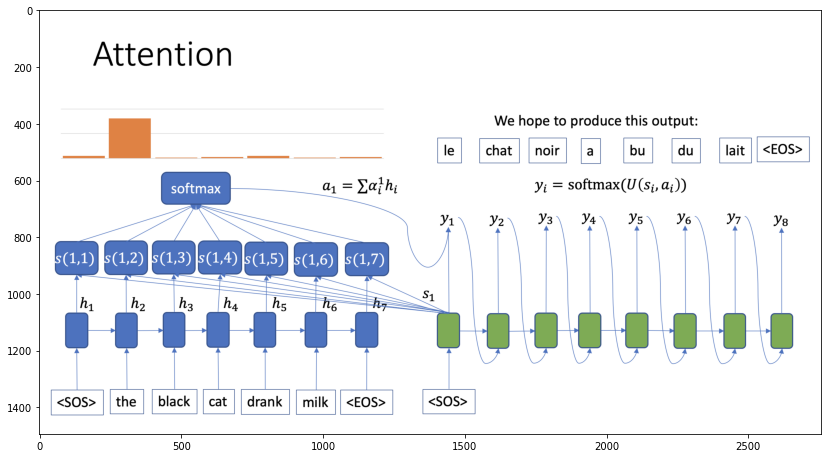

In [ ]:
showimage("./document/images/attention_mechanism_01.png", (14, 12))

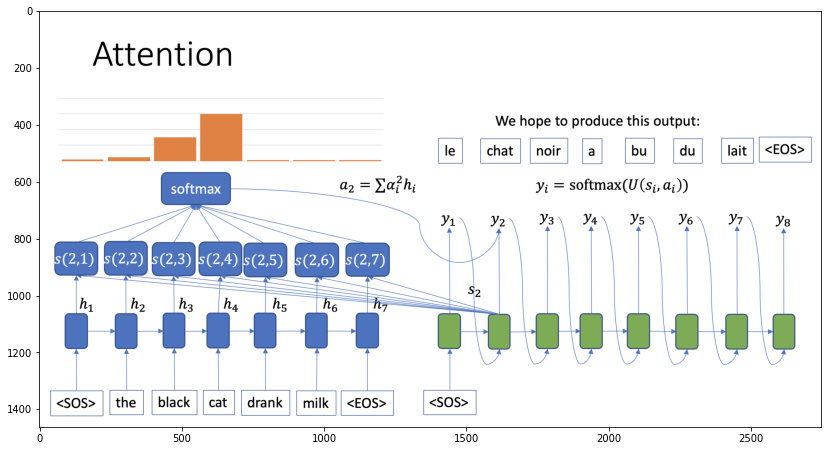

In [ ]:
showimage("./document/images/attention_mechanism_02.png", (14, 12))

The attention mechanism has an advantage of paying attention to the most relavent information in the source input.

- European Economic Area --> zone économique européen <br>
- My birthday present is one book --> 我的生日礼物是一本书

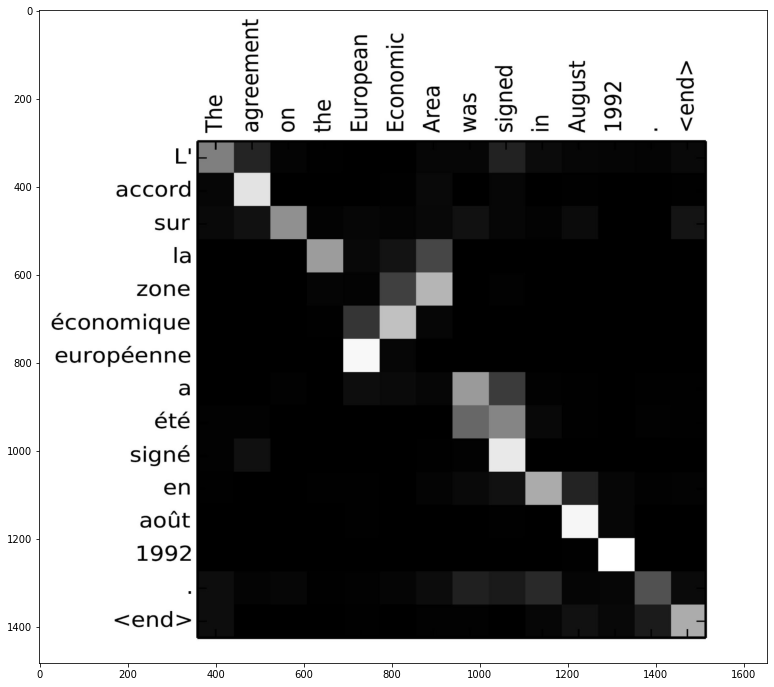

In [ ]:
showimage("./document/images/alignment.png", (14, 12))

### Types of attention
- Dot product
- Multiplicative
- Additive

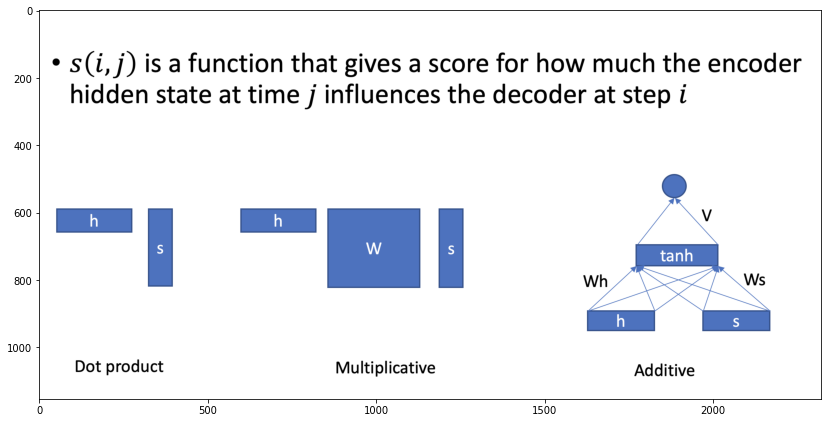

In [ ]:
showimage("./document/images/types_of_attention.png", (14, 12))

There are some other types of attention mechanisms.

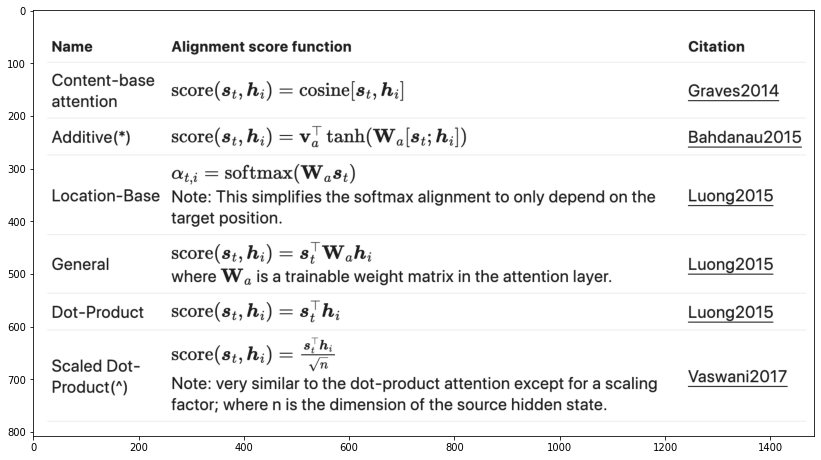

In [ ]:
showimage("./document/images/other_attention_mechanism.png", (14, 12))

# Annotated_Transformer_English_to_Chinese_Translator

```python
Created on   :2020/09/19 23:27:28
@author      :Caihao (Chris) Cui
@file        :Annotated_Transformer_English_to_Chinese_Translator.ipynb
@content     :Transformer English-to-Chinese.
@version     :0.1.0
```


In this notebook, I will build a Transformer model (neural network model) to translate English sentence to Chinese sentences.

The reference paper is [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)

![](document/images/google_translate.png )

The full data set only contains around 10,000 sentence pairs. But this is very good practice to imporve your python programming skills and get deeper understanding of pytorch and Transformaer(neural networks).

![Attention Is All You Need](document/images/google_paper.png)

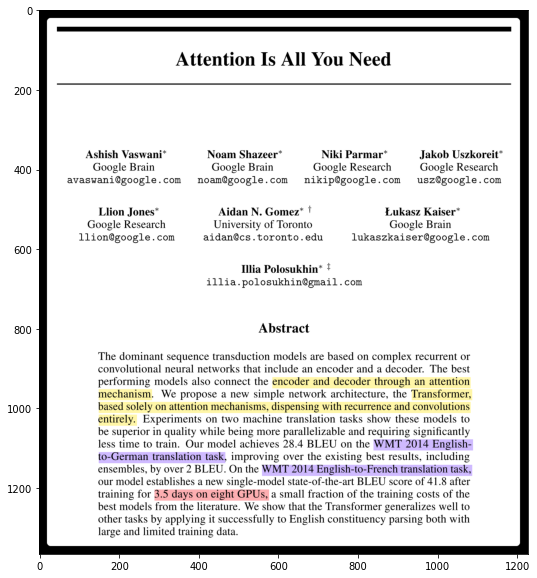

In [ ]:
showimage("document/images/google_paper.png",(16,10))

## 1. Understand the Transformer Model
 
The Whole Transformer  encoder-decoder model architecture  services for the following purposes. 


- Encoder(s): the encoding process transforms the input sentence (list of English words) into numeric matrix format (embedding ), consider this step is to extract useful and necessary information for the decode
. In the following figure, the embedding is represented by the green matrix.

- Decoder(s): then the decoding process mapping these embeddings back to another language sequence as figure below shown, which helps us to solve all kinds of supervised NLP tasks, like machine translation (in this blog), sentiment classification, entity recognition,  summary generation, semantic relation extraction and so on. 
 


 

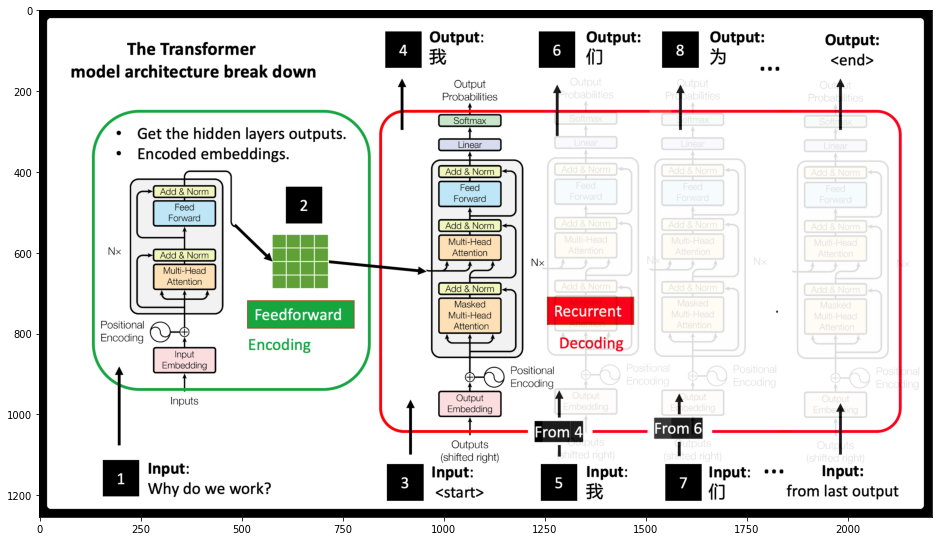

In [ ]:
showimage("./document/images/Understand_How_Transformer_Work.png",(16,10))

## 2. Encoder 
  
We will focus on the structure of the encoder in this section, because after understanding the structure of the encoder, understanding the decoder will be very simple. Moreover we can just use the encoder to complete some of the mainstream tasks in NLP, such as sentiment classification, semantic relationship analysis, named entity recognition and so on.

Recall that the Encoder denotes the process of mapping natural language sequences to mathematical expressions to hidden layers outputs.

**Here is a Transformer Encoder Block structure**
> Notification: the following sections will refer to the 1,2,3,4 blocks.



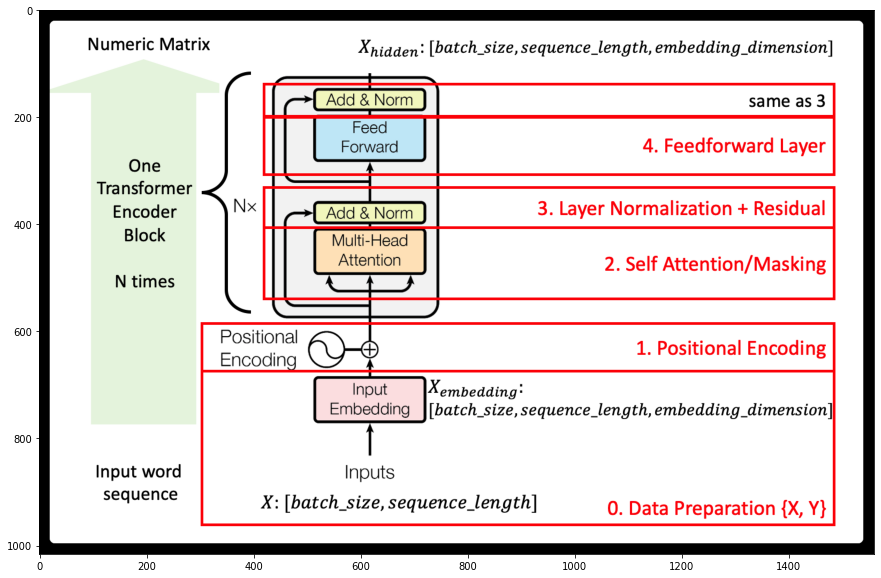

In [ ]:
showimage("./document/images/encoder.png",(16,10))

### 2.0 Data Preparation: English-to-Chinese Translator Data

In [ ]:
import os
os.listdir(".")

['README.md',
 'Transformer.py',
 'environment.yml',
 '.gitattributes',
 'LICENSE',
 'Annotated_Transformer_English_to_Chinese_Translator.py',
 '.gitignore',
 'document',
 '.ipynb_checkpoints',
 'data',
 'save',
 'Annotated_Transformer_English_to_Chinese_Translator.ipynb']

In [ ]:
import os
import math
import copy
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk import word_tokenize
import nltk

from collections import Counter
from torch.autograd import Variable
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!ls -lh ./data/nmt/en-cn 

total 2.3M
-rw------- 1 root root 1.1M Sep 20  2020 cmn.txt
-rw------- 1 root root  13K Sep 20  2020 dev_mini.txt
-rw------- 1 root root 111K Sep 20  2020 dev.txt
-rw------- 1 root root  13K Sep 20  2020 test_mini.txt
-rw------- 1 root root 112K Sep 20  2020 test.txt
-rw------- 1 root root  63K Sep 20  2020 train_mini.txt
-rw------- 1 root root 895K Sep 20  2020 train.txt


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# init parameters
UNK = 0  # unknow word-id
PAD = 1  # padding word-id
BATCH_SIZE = 64   

DEBUG = False    # Debug / Learning Purposes. 
# DEBUG = False # Build the model, better with GPU CUDA enabled.

if DEBUG:        
    EPOCHS  = 2   
    LAYERS  = 3   
    H_NUM   = 8    
    D_MODEL = 128   
    D_FF    = 256      
    DROPOUT = 0.1   
    MAX_LENGTH = 60   
    TRAIN_FILE = 'data/nmt/en-cn/train_mini.txt'   
    DEV_FILE   = 'data/nmt/en-cn/dev_mini.txt'   
    SAVE_FILE  = 'save/models/model.pt'   
else:
    EPOCHS  = 20  
    LAYERS  = 6    
    H_NUM   = 8    
    D_MODEL = 256    
    D_FF    = 1024   
    DROPOUT = 0.1    
    MAX_LENGTH = 60  
    TRAIN_FILE = 'data/nmt/en-cn/train.txt'   
    DEV_FILE   = 'data/nmt/en-cn/dev.txt'   
    SAVE_FILE  = 'save/models/large_model.pt'  

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
def seq_padding(X, padding=0):
    """
    add padding to a batch data 
    """
    L = [len(x) for x in X]
    ML = max(L)
    return np.array([
        np.concatenate([x, [padding] * (ML - len(x))]) if len(x) < ML else x for x in X
    ])    

class PrepareData:
    def __init__(self, train_file, dev_file):
        # 01. Read the data and tokenize
        self.train_en, self.train_cn = self.load_data(train_file)
        self.dev_en, self.dev_cn     = self.load_data(dev_file)

        # 02. build dictionary: English and Chinese
        self.en_word_dict, self.en_total_words, self.en_index_dict = self.build_dict(self.train_en)
        self.cn_word_dict, self.cn_total_words, self.cn_index_dict = self.build_dict(self.train_cn)

        # 03. word to id by dictionary 
        self.train_en, self.train_cn = self.wordToID(self.train_en, self.train_cn, self.en_word_dict, self.cn_word_dict)
        self.dev_en, self.dev_cn     = self.wordToID(self.dev_en, self.dev_cn, self.en_word_dict, self.cn_word_dict)

        # 04. batch + padding + mask
        self.train_data = self.splitBatch(self.train_en, self.train_cn, BATCH_SIZE)
        self.dev_data   = self.splitBatch(self.dev_en, self.dev_cn, BATCH_SIZE)

    def load_data(self, path):
        """
        Read English and Chinese Data 
        tokenize the sentence and add start/end marks(Begin of Sentence; End of Sentence)
        en = [['BOS', 'i', 'love', 'you', 'EOS'], 
              ['BOS', 'me', 'too', 'EOS'], ...]
        cn = [['BOS', '我', '爱', '你', 'EOS'], 
              ['BOS', '我', '也', '是', 'EOS'], ...]
        """
        en = []
        cn = []
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip().split('\t')
                en.append(["BOS"] + word_tokenize(line[0].lower()) + ["EOS"])
                cn.append(["BOS"] + word_tokenize(" ".join([w for w in line[1]])) + ["EOS"])
        return en, cn
    
    def build_dict(self, sentences, max_words = 50000):
        """
        sentences: list of word list 
        build dictonary as {key(word): value(id)}
        """
        word_count = Counter()
        for sentence in sentences:
            for s in sentence:
                word_count[s] += 1

        ls = word_count.most_common(max_words)
        total_words = len(ls) + 2
        word_dict = {w[0]: index + 2 for index, w in enumerate(ls)}
        word_dict['UNK'] = UNK
        word_dict['PAD'] = PAD
        # inverted index: {key(id): value(word)}
        index_dict = {v: k for k, v in word_dict.items()}
        return word_dict, total_words, index_dict

    def wordToID(self, en, cn, en_dict, cn_dict, sort=True):
        """
        convert input/output word lists to id lists. 
        Use input word list length to sort, reduce padding.
        """
        length = len(en)
        out_en_ids = [[en_dict.get(w, 0) for w in sent] for sent in en]
        out_cn_ids = [[cn_dict.get(w, 0) for w in sent] for sent in cn]

        def len_argsort(seq):
            """
            get sorted index w.r.t length.
            """
            return sorted(range(len(seq)), key=lambda x: len(seq[x]))

        if sort: # update index
            sorted_index = len_argsort(out_en_ids) # English
            out_en_ids = [out_en_ids[id] for id in sorted_index]
            out_cn_ids = [out_cn_ids[id] for id in sorted_index]
        return out_en_ids, out_cn_ids

    def splitBatch(self, en, cn, batch_size, shuffle=True):
        """
        get data into batches
        """
        idx_list = np.arange(0, len(en), batch_size)
        if shuffle:
            np.random.shuffle(idx_list)

        batch_indexs = []
        for idx in idx_list:
            batch_indexs.append(np.arange(idx, min(idx + batch_size, len(en))))
        
        batches = []
        for batch_index in batch_indexs:
            batch_en = [en[index] for index in batch_index]  
            batch_cn = [cn[index] for index in batch_index]
            # paddings: batch, batch_size, batch_MaxLength
            batch_cn = seq_padding(batch_cn)
            batch_en = seq_padding(batch_en)
            batches.append(Batch(batch_en, batch_cn)) 
            #!!! 'Batch' Class is called here but defined in later section.
        return batches

> Notification, the Batch class relates to the Attention/Mask in Encoder class. 

#### Input/Output Embeddings
Similary to all sequential model, we used learned embedding to convert the input/output vectors' dimensionality to $d_{model}$.
In our model, the two embedding layers and pre-softmax layer will share weight matrix.

In [ ]:
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__() 
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        # return x's embedding vector（times math.sqrt(d_model)）
        return self.lut(x) * math.sqrt(self.d_model)

Now, we have all the code for data preprocessing. Let's focus on the understand and build Transformer mode. 

### 2.1 Positional Encoding

The $Transformer$ does **not** contain iteration operation like RNN or LSTM in encoders, so we have to offer the position information of the words to the model, so the model learns the order in the input sequence.  

Thus, we define the **positional encoding** as [max_sequence_length, embedding_dimension]

In the paper, we use sine and cosine function to provide the position information.

$$PE_{(pos,2i)} = sin(pos / 10000^{2i/d_{\text{model}}}) \quad \quad PE_{(pos,2i+1)} = cos(pos / 10000^{2i/d_{\text{model}}})\tag{eq.1}$$  

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
                                  
        pe = torch.zeros(max_len, d_model, device=DEVICE)
        position = torch.arange(0., max_len, device=DEVICE).unsqueeze(1)
        div_term = torch.exp(torch.arange(0., d_model, 2, device=DEVICE) * -(math.log(10000.0) / d_model))
        pe_pos   = torch.mul(position, div_term)
        pe[:, 0::2] = torch.sin(pe_pos)
        pe[:, 1::2] = torch.cos(pe_pos)
        pe = pe.unsqueeze(0) 
                                  
        self.register_buffer('pe', pe) # pe

    def forward(self, x):
        #  build pe w.r.t to the max_length
        #print(x.to(DEVICE),Variable(self.pe[:, :x.size(1)]))
        #x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
        x = x+self.pe[:,:x.size(1)]
        return self.dropout(x)

See, we first build the position encoding based on x and then add the 'pe' to the x in the forward function.

> Notification: Set 'requires_grad=False'，because we do not need to train pe.

Here are the position embedding visualisations, you can find the pattern changes with the increasing embedding dimensions. 

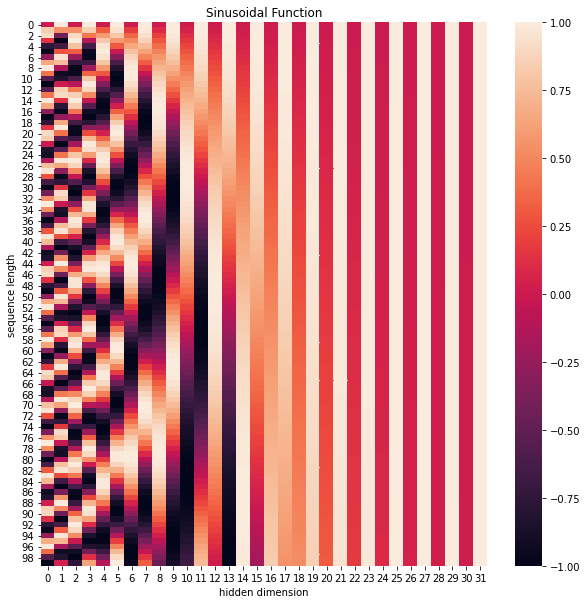

In [ ]:
pe = PositionalEncoding(32, 0, 100)  # d_model, dropout-ratio, max_len
positional_encoding = pe.forward(torch.zeros(1, 100, 32).to(device= DEVICE)) # sequence length, d_model
plt.figure(figsize=(10,10))
sns.heatmap(positional_encoding.squeeze().cpu()) # 100x32 matrix
plt.title("Sinusoidal Function")
plt.xlabel("hidden dimension")
plt.ylabel("sequence length")
None

Variable(pe.pe[:,100],requires_grad=False)

test = torch.zeros(1, 100, 32).to(device  = DEVICE)


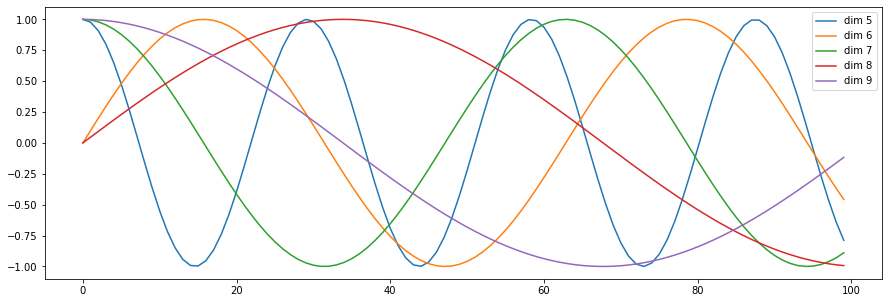

In [ ]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(24, 0)
y = pe.forward(torch.zeros(1, 100, 24).to(device = DEVICE))
plt.plot(np.arange(100), y[0, :, 5:10].data.cpu().numpy())
plt.legend(["dim %d"%p for p in [5,6,7,8,9]])
None

### 2.2 Self Attention and Mask

An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key.

We call our particular attention “Scaled Dot-Product Attention”. The input consists of queries and keys of dimension $d_k$, and values of dimension $d_v$. 

We compute the dot products of the query with all keys, divide each by $\sqrt{d_k}$, and apply a softmax function to obtain the weights on the values.

![self_attention](document/images/self-attention.png)


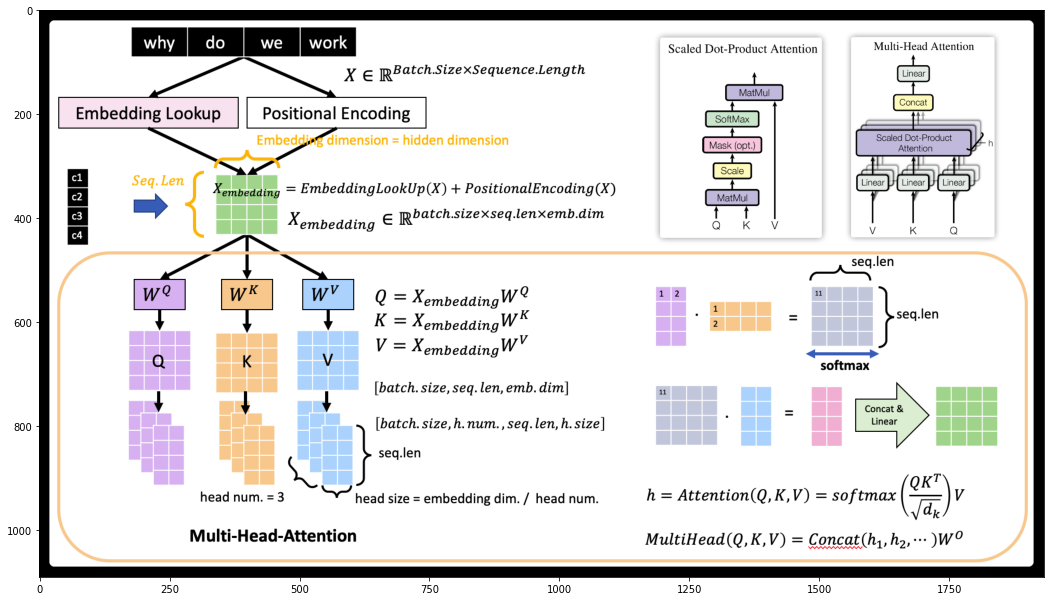

In [ ]:
showimage("./document/images/self-attention.png",(18,12))

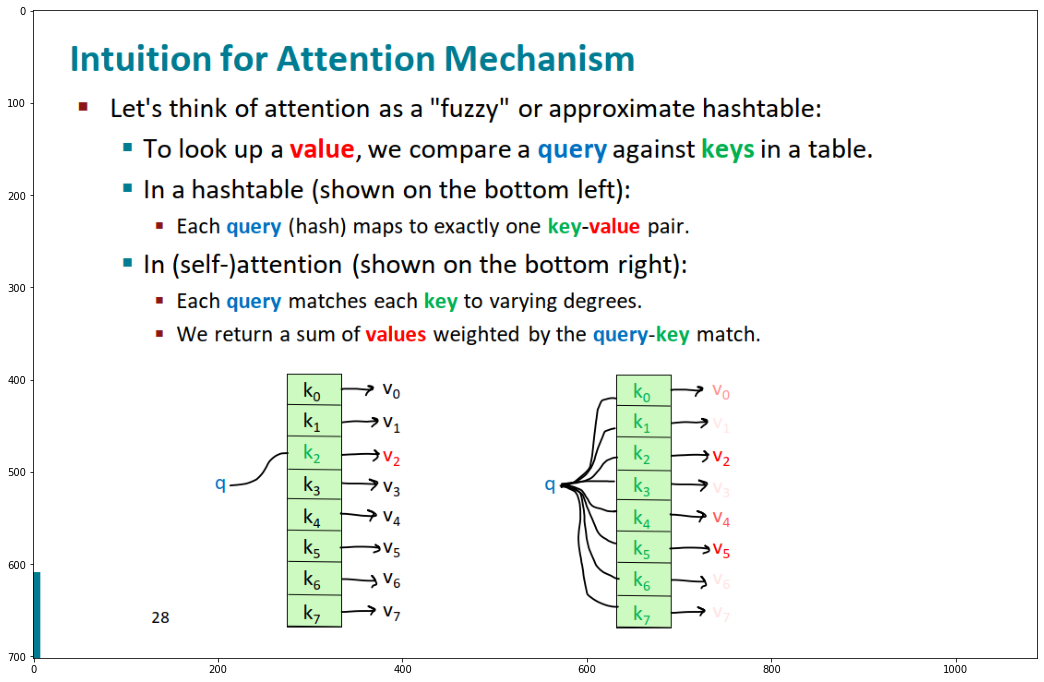

In [ ]:
showimage("./document/images/Intuition_Attention.png",(18,12))

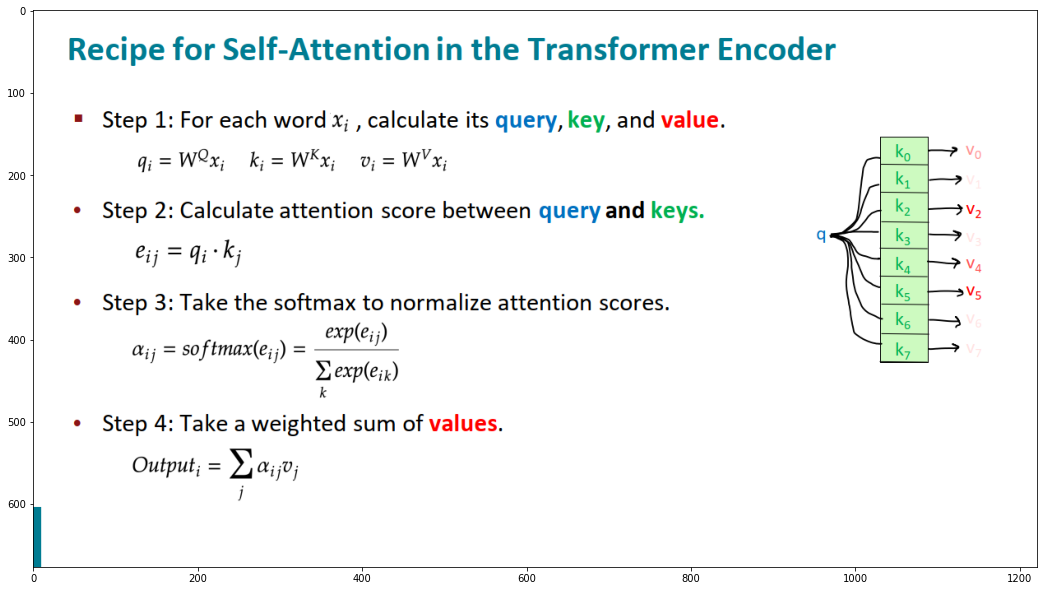

In [ ]:
showimage("./document/images/attention_recipe.png",(18,12))

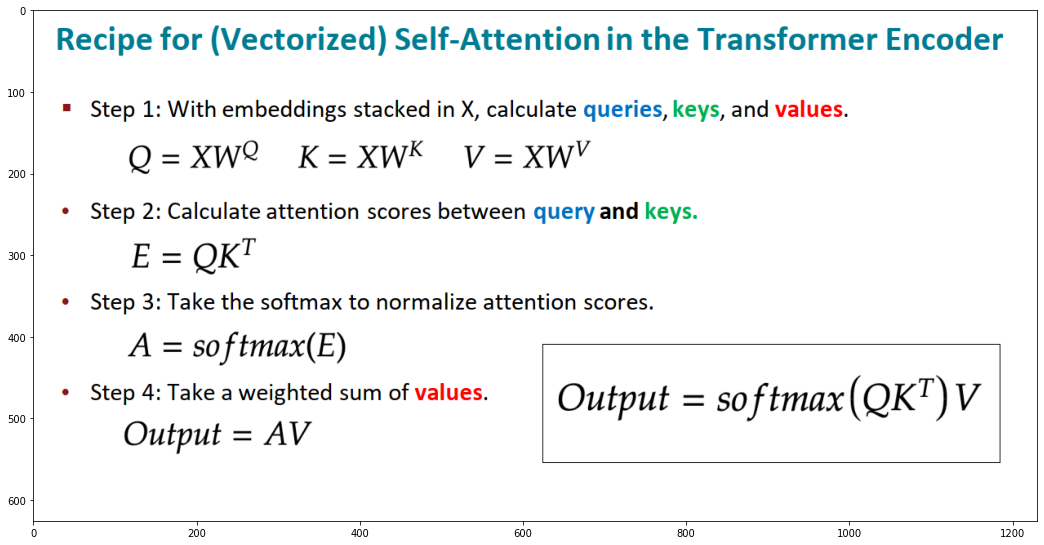

In [ ]:
showimage("./document/images/attention_matrix.png",(18,12))

 The two most commonly used attention functions are additive attention, and dot-product (multiplicative) attention. Dot-product attention is identical to our algorithm, except for the scaling factor of $\frac{1}{\sqrt{d_k}}$
. Additive attention computes the compatibility function using a feed-forward network with a single hidden layer. While the two are similar in theoretical complexity, dot-product attention is much faster and more space-efficient in practice, since it can be implemented using highly optimized matrix multiplication code.

To illustrate why the dot products get large, assume that the components of q and k are independent random variables with mean 0  and variance 1 . Then their dot product, $q\cdot k $ has mean 0 and variance $d_k$,To counteract this effect, we scale the dot products by  $\frac{1}{\sqrt{d_k}}$.

In [ ]:
def attention(query, key, value, mask=None, dropout=None):
    "Compute 'Scaled Dot Product Attention'"
    d_k = query.size(-1) 
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    p_attn = F.softmax(scores, dim=-1)
    if dropout is not None:
        p_attn = dropout(p_attn)
    return torch.matmul(p_attn, value), p_attn

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this.

In [ ]:
class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        "Take in model size and number of heads."
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0 # check the h number
        self.d_k = d_model // h
        self.h = h
        # 4 linear layers: WQ WK WV and final linear mapping WO  
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        if mask is not None:
            # Same mask applied to all h heads.
            mask = mask.unsqueeze(1)
        nbatches = query.size(0) # get batch size
        # 1) Do all the linear projections in batch from d_model => h x d_k 
        # parttion into h sections，switch 2,3 axis for computation. 
        query, key, value = [l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2) 
                             for l, x in zip(self.linears, (query, key, value))]
        # 2) Apply attention on all the projected vectors in batch.
        x, self.attn = attention(query, key, value, mask=mask, dropout=self.dropout)
        # 3) "Concat" using a view and apply a final linear. 
        x = x.transpose(1, 2).contiguous().view(nbatches, -1, self.h * self.d_k)
        return self.linears[-1](x) # final linear layer

**Attention Mask**

The input $X$ is $[batch-size,  sequence-length]$, we use 'padding' to fill the matrix with 0 with respect to the longest sequence. 

But this will case issues for the softmax computation. 
$\sigma(\mathbf {z})_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}$, where $e^0=1$.

This means the padding sections join the computation, but they shouldn't. So we create this mask to ignore these area by assign a large negative bias.
 
$$z_{illegal} = z_{illegal} + bias_{illegal}$$
$$bias_{illegal} \to -\infty$$
$$e^{z_{illegal}} \to 0 $$  
  
Thus, the masked area will lead to 0 so we avoid them in computation.

> Notification: in self-attention compution, we use mini-batch data as input, means we feed multiply lines of sentences into the model for training and computation. 


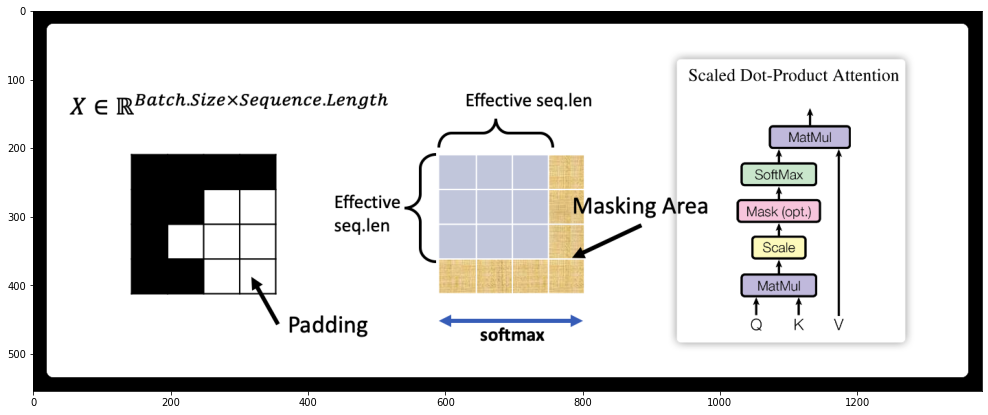

In [ ]:
showimage("./document/images/attention_mask.png",(17,10))

![](document/images/attention_mask.png)

In Transformer, both encoder and decoder attention computations need masking operation, but their functions are different.

In the decoder, the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to '-inf') before the softmax step in the self-attention calculation.

The “Encoder-Decoder Attention” layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack.
  
Here, we define a batch object that holds the src (English) and target sentences (Chinese) for training, as well as constructing the masks.

> Notification: Mask(Opt.) is between Scale and Softmax
 

In [ ]:
class Batch:
    "Object for holding a batch of data with mask during training."
    def __init__(self, src, trg=None, pad=0):
        # convert words id to long format.  
        src = torch.from_numpy(src).to(DEVICE).long()
        trg = torch.from_numpy(trg).to(DEVICE).long()
        self.src = src
        # get the padding postion binary mask
        # change the matrix shape to  1×seq.length
        self.src_mask = (src != pad).unsqueeze(-2)
        # 如果输出目标不为空，则需要对decoder要使用到的target句子进行mask
        if trg is not None:
            # decoder input from target 
            self.trg = trg[:, :-1]
            # decoder target from trg 
            self.trg_y = trg[:, 1:]
            # add attention mask to decoder input  
            self.trg_mask = self.make_std_mask(self.trg, pad)
            # check decoder output padding number
            self.ntokens = (self.trg_y != pad).data.sum()
    
    # Mask 
    @staticmethod
    def make_std_mask(tgt, pad):
        "Create a mask to hide padding and future words."
        tgt_mask = (tgt != pad).unsqueeze(-2)
        tgt_mask = tgt_mask & Variable(subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data))
        return tgt_mask # subsequent_mask is defined in 'decoder' section.

### 2.3 Layer Normalization and Residual Connection

1). **LayerNorm**:   
  
**Layer Normalization** normalize the hidden layer output into standard format, i.i.d, to boost the training efficency and model weight convergence (row wise). 
$$\mu_{i}=\frac{1}{m} \sum^{m}_{i=1}x_{ij}$$  
  
$$\sigma^{2}_{j}=\frac{1}{m} \sum^{m}_{i=1}
(x_{ij}-\mu_{j})^{2}$$  
  
$$LayerNorm(x)=\alpha \odot \frac{x_{ij}-\mu_{i}}
{\sqrt{\sigma^{2}_{i}+\epsilon}} + \beta \tag{eq.5}$$  
  
$\epsilon$ is to avoid $0$ division; **$\alpha, \beta$** are parameter, $\odot$ denotes element-wise product. Normally, we initialize $\alpha$ as 1s and $\beta$ as 0s.

2). **Residual Connection**:   
 
We employ a residual connection  around each of the two sub-layers, followed by layer normalization.
We get the Value matrix with the weights from attenations $Attention(Q,  K, V)$, and then we 
transpose it to make sure it shares the same shape of $X_{embedding}:[batch.size, sequence.length, embedding.dimension]$. And then add them together.

$$X_{embedding} + Attention(Q, K, V)$$  
  
In the following compuations, after each module, we add the input with the output of the module to get residual connection, which allows the gradients be back-propogated to the start layers. 
$$X + SubLayer(X) \tag{eq. 6}$$  
  
> **Notification**: to $SubLayer(X)$ we call the dropout function and then add x, $X + Dropout(SubLayer(X))$

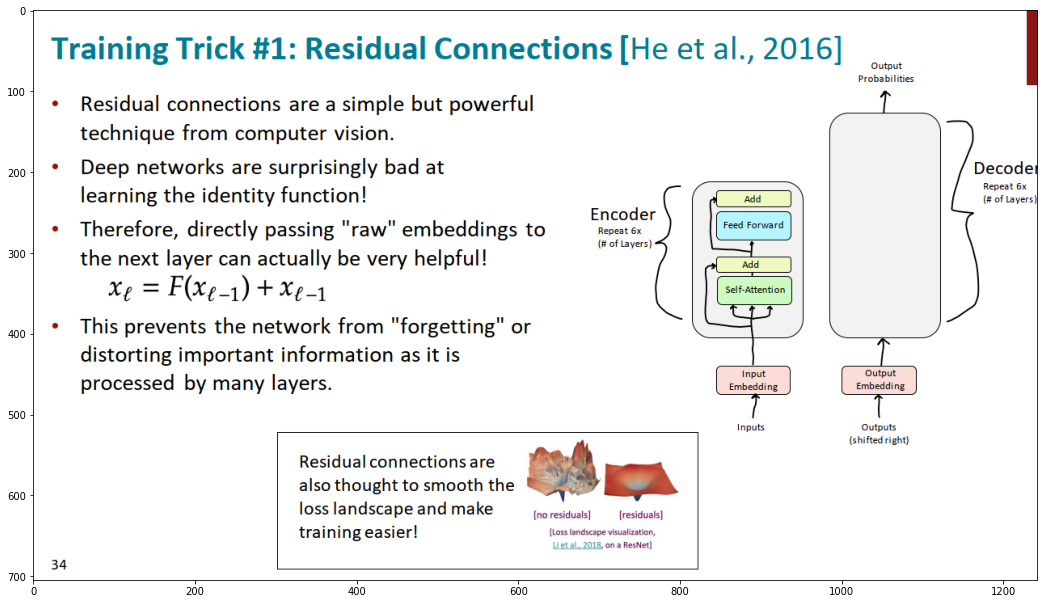

In [ ]:
showimage("./document/images/residue_connection.png",(18,12))

In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True) # rows
        std = x.std(-1, keepdim=True)
        x_zscore = (x - mean)/ torch.sqrt(std ** 2 + self.eps) 
        return self.a_2*x_zscore+self.b_2 

PyTorch has nn.LayerNorm，but we apply math equations here to learn. 

In [ ]:
class SublayerConnection(nn.Module):
    """
    A residual connection followed by a layer norm.
    Note for code simplicity the norm is first as opposed to last.
    SublayerConnection: connect Multi-Head Attention and Feed Forward Layers 
    """
    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)
    #how come there is a sublayer in forward function
    #doesn't have to be just x, can add whatever is needed for feeding forward, eg. mask etc.
    #eg. in the encoder block below, 2 sublayerConnections, the first is attention mask, second is regular ff
    def forward(self, x, sublayer):
        "Apply residual connection to any sublayer with the same size."
        return x + self.dropout(sublayer(self.norm(x)))

### 2.4 Feedforwad Networks 
**Position-wise Feed-Forward Networks**

In addition to attention sub-layers, each of the layers in our encoder and decoder contains a fully connected feed-forward network, which is applied to each position separately and identically. This consists of two linear transformations with a ReLU activation in between.

$$ FFN(x) = max(0, xW_1 + b_1)W_2 + b_2$$

While the linear transformations are the same across different positions, they use different parameters from layer to layer. Another way of describing this is as two convolutions with kernel size 1.

The dimensionality of input and output is $d_{model}$, and the inner-layer has dimensionality $d_{ff}$.

In [ ]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        h1 = self.w_1(x)
        h2 = self.dropout(h1)
        return self.w_2(h2)

### 2.5 Transformer Encoder Overview

Now, we have programmed the four parts of the Transformer Encoder. Let us review how the data are transformed through all these layers.

1. **Word Embedding and Positional Encoding**:

$$X = EmbeddingLookup(X) + PositionalEncoding(X)$$

$$X \in \mathbb{R}^{batch.size \times  seq.len.\times   embed.dim.} $$  
  
2. **Self-Attention and Mask**:

$$Q = Linear(X) = XW_{Q}$$ 
$$K = Linear(X) = XW_{K}$$
$$V = Linear(X) = XW_{V}$$
$$X_{attention} = SelfAttention(Q, K, V)$$  

3. **Residual Connection and Layer Normalization**:

$$X_{attention} = LayerNorm(X_{attention})$$
$$X_{attention} = X + X_{attention} $$  

4. **Position-wise Feed-Forward Networks** two linear mappings with ReLU Avtivation function:
$$X_{hidden} = Linear(Activate(Linear(X_{attention})))$$  
  
5. **Repeat 3** :
$$X_{hidden} = LayerNorm(X_{hidden})$$
$$X_{hidden} = X_{attention} + X_{hidden}$$

$$X_{hidden} \in \mathbb{R}^{batch.size \times  seq.len.\times   embed.dim.}$$  
  

In [ ]:
def clones(module, N):
    """
    "Produce N identical layers."
    Use deepcopy the weight are indenpendent.
    """
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

In the paper, $Encoder$ has $N=6$ blocks.

In [ ]:
class Encoder(nn.Module):
    "Core encoder is a stack of N layers (blocks)"
    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, mask):
        """
        Pass the input (and mask) through each layer in turn.
        """
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)

Each **Encoder Block** contains two sub-layers(**Self-Attention**,**Position-wise**) and 2 sublayer-connetions:
 

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 2)
        self.size = size # d_model

    def forward(self, x, mask):
        # X-embedding to Multi-head-Attention
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        # X-embedding to feed-forwad nn
        return self.sublayer[1](x, self.feed_forward)

## 3.  Decoder

After the introduction of the encoder structure, we can see the decoder shares a lot similarities of encoder.
It also stacks N times. But there is a Encoder-Deconder-Contex-Attention layer (sublayer[1]) between the Masked MHA[0] and FFN[2]. It use the output of the decoder as query to search the output of encoder with MHA, which makes decoder see all the outputs from encoder.

Decoding process:
- Input: Encoding output(memory) and i-1 position decoder output/
- Output: i position output work probabilities.
- decoding process works like RNN.

![Decoder Structure](document/images/decoder.png)

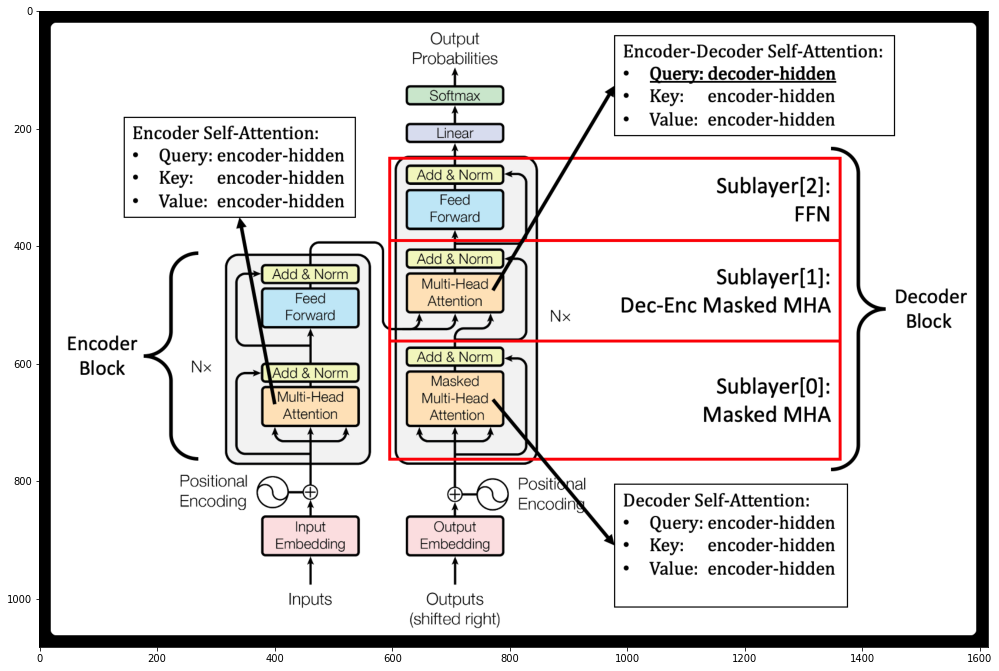

In [ ]:
showimage("./document/images/decoder.png",(17,12))

In [ ]:
class Decoder(nn.Module):
    def __init__(self, layer, N):
        "Generic N layer decoder with masking."
        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        """
        Repeat decoder N times
        Decoderlayer get a input attention mask (src) 
        and a output attention mask (tgt) + subsequent mask 
        """
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)


class DecoderLayer(nn.Module):
    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size, dropout), 3)

    def forward(self, x, memory, src_mask, tgt_mask):
        m = memory # encoder output embedding
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        # Context-Attention：q=decoder hidden，k,v from encoder hidden
        return self.sublayer[2](x, self.feed_forward)

We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This masking (**subsequent_mask**), combined with fact that the output embeddings are offset by one position, ensures that the predictions for position i can depend only on the known outputs at positions less than i .


For Encoder src-mask, just mask the padding cells. 
But for decoder trg-mask, we need mask the padding and add the subsequent-mask process.  

In [ ]:
def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

Below the attention mask shows the position each tgt word (row) is allowed to look at (column). Words are blocked for attending to future words during training.
"Yellow" color denote True.

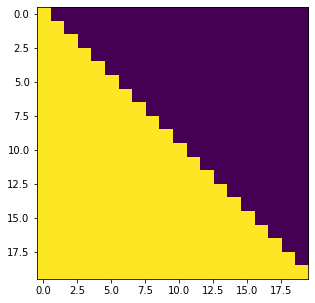

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(subsequent_mask(20)[0])
None

## 4. Transformer Model
  
Finally, let us put encoder and decoder together with the 'generator'.

![](document/images/English-to-Chinese.png)

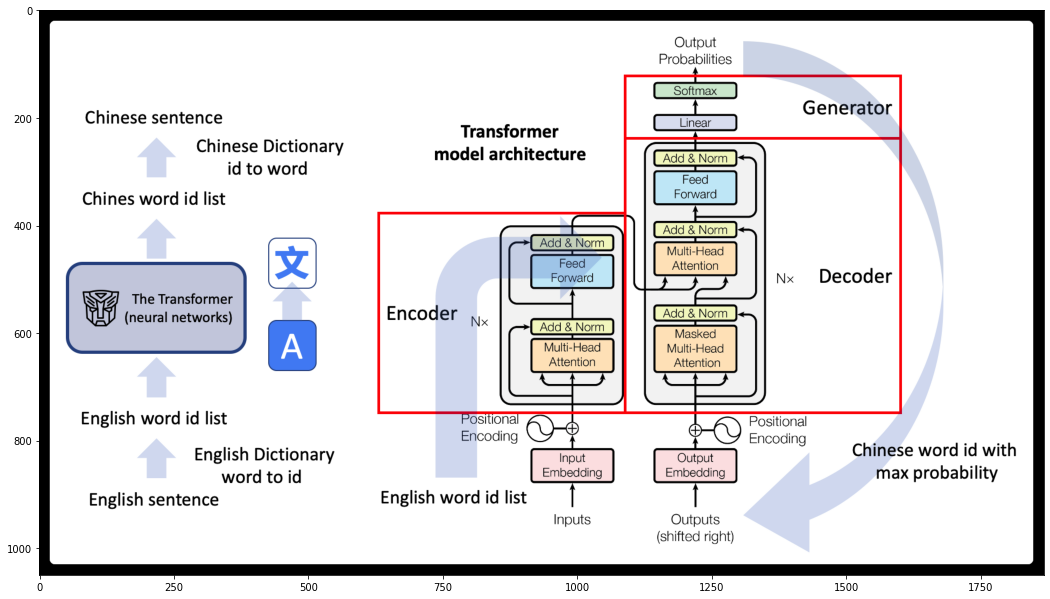

In [ ]:
showimage("./document/images/English-to-Chinese.png",(18,12))

Recall the decoder then generates an output sequence, of symbols one element at a time. At each step the model is auto-regressive (cite), consuming the previously generated symbols as additional input when generating the next. 

In [ ]:
class Transformer(nn.Module):
    def __init__(self, encoder, decoder, src_embed, tgt_embed, generator):
        super(Transformer, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embed
        self.generator = generator 

    def encode(self, src, src_mask):
        return self.encoder(self.src_embed(src), src_mask)

    def decode(self, memory, src_mask, tgt, tgt_mask):
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)

    def forward(self, src, tgt, src_mask, tgt_mask):
        "Take in and process masked src and target sequences."
        # encoder output will be the decoder's memory for decoding
        return self.decode(self.encode(src, src_mask), src_mask, tgt, tgt_mask)

In [ ]:
class Generator(nn.Module):
    def __init__(self, d_model, vocab):
        super(Generator, self).__init__()
        # decode: d_model to vocab mapping
        self.proj = nn.Linear(d_model, vocab)

    def forward(self, x):
        return F.log_softmax(self.proj(x), dim=-1)

**Set Parameters and Create the Full Transformer model Function**

In [ ]:
def make_model(src_vocab, tgt_vocab, N=6, d_model=512, d_ff=2048, h = 8, dropout=0.1):
    c = copy.deepcopy
    #  Attention 
    attn = MultiHeadedAttention(h, d_model).to(DEVICE)
    #  FeedForward 
    ff = PositionwiseFeedForward(d_model, d_ff, dropout).to(DEVICE)
    #  Positional Encoding
    position = PositionalEncoding(d_model, dropout).to(DEVICE)
    #  Transformer 
    model = Transformer(
        Encoder(EncoderLayer(d_model, c(attn), c(ff), dropout).to(DEVICE), N).to(DEVICE),
        Decoder(DecoderLayer(d_model, c(attn), c(attn), c(ff), dropout).to(DEVICE), N).to(DEVICE),
        nn.Sequential(Embeddings(d_model, src_vocab).to(DEVICE), c(position)),
        nn.Sequential(Embeddings(d_model, tgt_vocab).to(DEVICE), c(position)),
        Generator(d_model, tgt_vocab)).to(DEVICE)
    
    # This was important from their code. 
    # Initialize parameters with Glorot / fan_avg.
    # Paper title: Understanding the difficulty of training deep feedforward neural networks Xavier
    for p in model.parameters():
        if p.dim() > 1:
            nn.init.xavier_uniform_(p)
    return model.to(DEVICE)

## 5. Transformer Model Training: English-to-Chinese  

Regularization **Label Smoothing**

During training, we employed label smoothing of value $\epsilon_{ls}=0.1$ (https://arxiv.org/pdf/1512.00567.pdf). 

This hurts perplexity, as the model learns to be more unsure, but improves accuracy and BLEU score.
  
>We implement label smoothing using the KL div loss. Instead of using a one-hot target distribution, we create a distribution that has confidence of the correct word and the rest of the smoothing mass distributed throughout the vocabulary.

In [ ]:
class LabelSmoothing(nn.Module):
    "Implement label smoothing."
    def __init__(self, size, padding_idx, smoothing=0.0):
        super(LabelSmoothing, self).__init__()
        self.criterion = nn.KLDivLoss(reduction='sum') # 2020 update
        self.padding_idx = padding_idx
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.size = size
        self.true_dist = None
        
    def forward(self, x, target):
        assert x.size(1) == self.size
        true_dist = x.data.clone()
        true_dist.fill_(self.smoothing / (self.size - 2))
        true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        true_dist[:, self.padding_idx] = 0
        mask = torch.nonzero(target.data == self.padding_idx)
        if mask.dim() > 0:
            true_dist.index_fill_(0, mask.squeeze(), 0.0)
        self.true_dist = true_dist
        return self.criterion(x, Variable(true_dist, requires_grad=False))

Here, 'size' is from vocab，'smoothing' is value to be distributed on non-groundtruth.
We can see an example of how the mass is distributed to the words based on confidence.

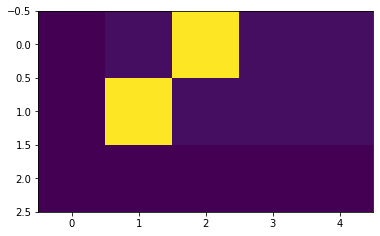

In [ ]:
# Example of label smoothing.
crit = LabelSmoothing(5, 0, 0.1)  #  ϵ=0.4
predict = torch.FloatTensor([[0, 0.2, 0.7, 0.1, 0],
                             [0, 0.2, 0.7, 0.1, 0], 
                             [0, 0.2, 0.7, 0.1, 0]])
v = crit(Variable(predict.log()), Variable(torch.LongTensor([2, 1, 0])))

# Show the target distributions expected by the system.
plt.imshow(crit.true_dist)
None

Label smoothing actually starts to penalize the model if it gets very confident about a given choice.

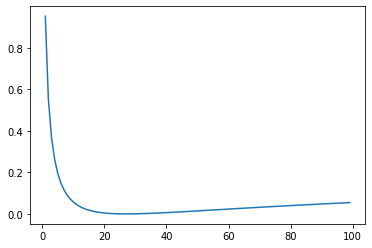

In [ ]:
crit = LabelSmoothing(5, 0, 0.1)
def loss(x):
    d = x + 3 * 1
    predict = torch.FloatTensor([[0, x / d, 1 / d, 1 / d, 1 / d]])
    return crit(Variable(predict.log()), Variable(torch.LongTensor([1]))).item()

plt.plot(np.arange(1, 100), [loss(x) for x in range(1, 100)])
None

**Loss Computation**

In [ ]:
class SimpleLossCompute:
    def __init__(self, generator, criterion, opt=None):
        self.generator = generator
        self.criterion = criterion
        self.opt = opt
        
    def __call__(self, x, y, norm):
        x = self.generator(x)
        loss = self.criterion(x.contiguous().view(-1, x.size(-1)), 
                              y.contiguous().view(-1)) / norm
        loss.backward()
        if self.opt is not None:
            self.opt.step()
            self.opt.optimizer.zero_grad()
        return loss.data.item() * norm.float()

**Optimizer with Warmup Learning Rate**

According to the paper, they applied a warmup learning rate with Adam Optimizer with $\beta_1=0.9、\beta_2=0.98$ 和 $\epsilon = 10^{−9}$.  

This will update the learning rate over the course of training, according to the formula:

$$lrate = d^{−0.5}_{model}⋅min(step\_num^{−0.5},\; step\_num⋅warmup\_steps^{−1.5})$$  

This corresponds to increasing the learning rate linearly for the first "warmup_steps" training steps, and decreasing it thereafter proportionally to the inverse square root of the step number.

In [ ]:
class NoamOpt:
    "Optim wrapper that implements rate."
    def __init__(self, model_size, factor, warmup, optimizer):
        self.optimizer = optimizer
        self._step = 0
        self.warmup = warmup
        self.factor = factor
        self.model_size = model_size
        self._rate = 0
        
    def step(self):
        "Update parameters and rate"
        self._step += 1
        rate = self.rate()
        for p in self.optimizer.param_groups:
            p['lr'] = rate
        self._rate = rate
        self.optimizer.step()
        
    def rate(self, step = None):
        "Implement `lrate` above"
        if step is None:
            step = self._step
        return self.factor * (self.model_size ** (-0.5) * min(step ** (-0.5), step * self.warmup ** (-1.5)))
    
# We used factor=2, warmup-step = 4000
def get_std_opt(model):
    return NoamOpt(model.src_embed[0].d_model, 2, 4000,
            torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9))

all the updates are for the learning rate, 
- model-size denotes $d_{model}$. 
- warmup denotes  warmup-steps.
- factor is a scalar.

Example of the curves of this model for different model sizes and for optimization hyperparameters.

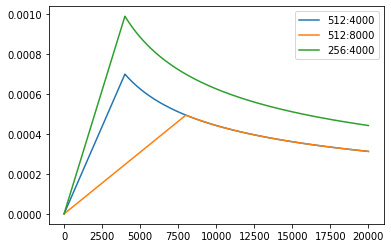

In [ ]:
# Three settings of the lrate hyperparameters.
opts = [NoamOpt(512, 1, 4000, None), 
        NoamOpt(512, 1, 8000, None),
        NoamOpt(256, 1, 4000, None)]
plt.plot(np.arange(1, 20000), [[opt.rate(i) for opt in opts] for i in range(1, 20000)])
plt.legend(["512:4000", "512:8000", "256:4000"])
None

**Training Iterators**

In [ ]:
def run_epoch(data, model, loss_compute, epoch):
    start = time.time()
    total_tokens = 0.
    total_loss = 0.
    tokens = 0.
    for i , batch in enumerate(data):
        out = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)
        loss = loss_compute(out, batch.trg_y, batch.ntokens)
        total_loss += loss
        total_tokens += batch.ntokens
        tokens += batch.ntokens
        if i % 50 == 1:
            elapsed = time.time() - start
            print("Epoch {:d} Batch: {:d} Loss: {:.4f} Tokens per Sec: {:.2f}s".format(epoch, i - 1, loss / batch.ntokens, (tokens.float() / elapsed / 1000.)))
            start = time.time()
            tokens = 0
    return total_loss / total_tokens

In [ ]:
def train(data, model, criterion, optimizer):
    """
    Train and Save the model.
    """
    # init loss as a large value
    best_dev_loss = 1e5
    
    for epoch in range(EPOCHS):
        # Train model 
        model.train()
        run_epoch(data.train_data, model, SimpleLossCompute(model.generator, criterion, optimizer), epoch)
        model.eval()

        # validate model on dev dataset
        print('>>>>> Evaluate')
        dev_loss = run_epoch(data.dev_data, model, SimpleLossCompute(model.generator, criterion, None), epoch)
        print('<<<<< Evaluate loss: {:.2f}'.format(dev_loss))
        
        # save the model with best-dev-loss
        if dev_loss < best_dev_loss:
            best_dev_loss = dev_loss
            torch.save(model.state_dict(), SAVE_FILE) # SAVE_FILE = 'save/model.pt'
            
        print(f">>>>> current best loss: {best_dev_loss}")

In [ ]:
# Step 1: Data Preprocessing
data = PrepareData(TRAIN_FILE, DEV_FILE)
src_vocab = len(data.en_word_dict)
tgt_vocab = len(data.cn_word_dict)
print(f"src_vocab {src_vocab}")
print(f"tgt_vocab {tgt_vocab}")

# Step 2: Init model
model = make_model(
                    src_vocab, 
                    tgt_vocab, 
                    LAYERS, 
                    D_MODEL, 
                    D_FF,
                    H_NUM,
                    DROPOUT
                )

# Step 3: Training model
print(">>>>>>> start train")
train_start = time.time()
criterion = LabelSmoothing(tgt_vocab, padding_idx = 0, smoothing= 0.0)
optimizer = NoamOpt(D_MODEL, 1, 2000, torch.optim.Adam(model.parameters(), lr=0, betas=(0.9,0.98), eps=1e-9))

train(data, model, criterion, optimizer)
print(f"<<<<<<< finished train, cost {time.time()-train_start:.4f} seconds")

src_vocab 5493
tgt_vocab 3194
>>>>>>> start train
Epoch 0 Batch: 0 Loss: 8.0699 Tokens per Sec: 3.80s
Epoch 0 Batch: 50 Loss: 7.2643 Tokens per Sec: 5.13s
Epoch 0 Batch: 100 Loss: 6.7598 Tokens per Sec: 4.55s
Epoch 0 Batch: 150 Loss: 5.6357 Tokens per Sec: 5.19s
Epoch 0 Batch: 200 Loss: 5.1119 Tokens per Sec: 5.34s
>>>>> Evaluate
Epoch 0 Batch: 0 Loss: 4.8246 Tokens per Sec: 6.42s
<<<<< Evaluate loss: 5.12
>>>>> current best loss: 5.123697757720947
Epoch 1 Batch: 0 Loss: 5.2701 Tokens per Sec: 3.77s
Epoch 1 Batch: 50 Loss: 5.4001 Tokens per Sec: 5.25s
Epoch 1 Batch: 100 Loss: 5.4403 Tokens per Sec: 4.87s
Epoch 1 Batch: 150 Loss: 4.5851 Tokens per Sec: 5.07s
Epoch 1 Batch: 200 Loss: 4.2390 Tokens per Sec: 5.40s
>>>>> Evaluate
Epoch 1 Batch: 0 Loss: 3.9850 Tokens per Sec: 6.86s
<<<<< Evaluate loss: 4.34
>>>>> current best loss: 4.344107627868652
Epoch 2 Batch: 0 Loss: 4.6554 Tokens per Sec: 4.69s
Epoch 2 Batch: 50 Loss: 4.6723 Tokens per Sec: 5.29s
Epoch 2 Batch: 100 Loss: 4.7475 Tokens 

## 6. Prediction with English-to-Chinese Translator

In [ ]:
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    """
    Translate src with model
    """
    # decode the src 
    memory = model.encode(src, src_mask)
    # init 1×1 tensor as prediction，fill in ('BOS')id, type: (LongTensor)
    ys = torch.ones(1, 1).fill_(start_symbol).type_as(src.data)
    #  run 遍历输出的长度下标
    for i in range(max_len-1):
        # decode one by one
        out = model.decode(memory, 
                           src_mask, 
                           Variable(ys), 
                           Variable(subsequent_mask(ys.size(1)).type_as(src.data)))
        #  out to log_softmax 
        prob = model.generator(out[:, -1])
        #  get the max-prob id
        _, next_word = torch.max(prob, dim = 1)
        next_word = next_word.data[0]
        #  concatnate with early predictions
        ys = torch.cat([ys,torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=1)
    return ys

English to Chinese Translations

In [ ]:
def evaluate(data, model):
    """
    Make prediction with trained model, and print results.
    """
    with torch.no_grad():
        #  pick some random sentences from dev data.         
        for i in np.random.randint(len(data.dev_en), size=10):
            # Print English sentence
            en_sent = " ".join([data.en_index_dict[w] for w in data.dev_en[i]])
            print("\n" + en_sent)
            
            # Print Target Chinese sentence
            cn_sent =  " ".join([data.cn_index_dict[w] for w in data.dev_cn[i]])
            print("".join(cn_sent))
            
            # conver English to tensor  
            src = torch.from_numpy(np.array(data.dev_en[i])).long().to(DEVICE)
            src = src.unsqueeze(0)
            # set attention mask
            src_mask = (src != 0).unsqueeze(-2)
            # apply model to decode, make prediction
            out = greedy_decode(model, src, src_mask, max_len=MAX_LENGTH, start_symbol=data.cn_word_dict["BOS"])
            # save all in the translation list 
            translation = []
            # convert id to Chinese, skip 'BOS' 0.
            # 遍历翻译输出字符的下标（注意：跳过开始符"BOS"的索引 0）
            for j in range(1, out.size(1)):
                sym = data.cn_index_dict[out[0, j].item()]
                if sym != 'EOS':
                    translation.append(sym)
                else:
                    break
            print("translation: {}".format(" ".join(translation)))

**English to Chinese Translator** 

In [ ]:
# Predition
model.load_state_dict(torch.load(SAVE_FILE))
print(">>>>>>> start evaluate")
evaluate_start  = time.time()
evaluate(data, model)         
print(f"<<<<<<< finished evaluate, cost {time.time()-evaluate_start:.4f} seconds")

>>>>>>> start evaluate

BOS whose shirt is this ? EOS
BOS 這 是 誰 的 襯 衫 。 EOS
translation: 这 是 谁 的 环 ？

BOS what a pity ! EOS
BOS 太 可 惜 了 ！ EOS
translation: 太 可 惜 了 ！

BOS three UNK is UNK . EOS
BOS 三 的 立 方 是 二 十 七 。 EOS
translation: 三 種 o m 是 一 个 行 的 。

BOS i will live in sasayama next year . EOS
BOS 我 明 年 會 住 在 筱 山 。 EOS
translation: 我 將 住 在 筱 山 。

BOS life is very hard . EOS
BOS 人 生 良 苦 。 EOS
translation: 生 活 很 难 以 來 。

BOS he played the part of hamlet . EOS
BOS 他 扮 演 哈 姆 雷 特 的 角 色 。 EOS
translation: 他 扮 演 哈 雷 特 的 角 色 。

BOS she is a quiet woman . EOS
BOS 她 是 一 個 安 靜 的 女 人 。 EOS
translation: 她 是 一 個 安 靜 的 女 人 。

BOS may i see your boarding pass , please ? EOS
BOS 請 讓 我 看 看 您 的 登 機 證 好 嗎 ? EOS
translation: 請 讓 我 看 見 你 的 登 機 嗎 ？

BOS you 're too UNK about everything . EOS
BOS 你 对 什 么 都 太 怀 疑 了 。 EOS
translation: 你 是 不 太 的 所 有 的 所 事 情 。

BOS i 'll miss you so much . EOS
BOS 我 會 非 常 想 念 你 。 EOS
translation: 我 會 很 想 念 你 。
<<<<<<< finished evaluate, cost 9.7246 seconds


If your translation does not look good, that is totally OK. 
You can change the “Debug“ to False and retrain the model with CUDA support.

In [ ]:
# Here is my pretrained model with CUDA support 
if DEVICE=="cuda":
    SAVE_FILE_EXTRA  = 'save/models/large_model.pt'  
    model.load_state_dict(torch.load(SAVE_FILE_EXTRA))
    print(">>>>>>> start evaluate")
    evaluate_start  = time.time()
    evaluate(data, model)         
    print(f"<<<<<<< finished evaluate, cost {time.time()-evaluate_start:.4f} seconds")

In [ ]:
print(">>>>>>> start evaluate")
evaluate_start  = time.time()
evaluate(data, model)         
print(f"<<<<<<< finished evaluate, cost {time.time()-evaluate_start:.4f} seconds")

>>>>>>> start evaluate

BOS you are the master of your own UNK . EOS
BOS 你 才 是 自 己 命 运 的 主 人 。 EOS
translation: 你 是 不 用 的 你 的 事 情 命 运 。

BOS please go to the bank . EOS
BOS 請 去 銀 行 。 EOS
translation: 請 去 銀 行 。

BOS i 've lost a little weight . EOS
BOS 我 瘦 了 一 點 。 EOS
translation: 我 反 對 一 點 的 重 要 。

BOS my brother is not as tall as i was two years ago . EOS
BOS 我 弟 弟 没 我 两 年 前 高 。 EOS
translation: 我 的 兄 弟 不 高 中 了 兩 歲 。

BOS the monkey fell from the tree . EOS
BOS 猴 子 從 樹 上 掉 了 下 來 。 EOS
translation: 猴 子 從 樹 上 從 樹 上 出 來 。

BOS we 'd better talk . EOS
BOS 我 们 谈 谈 比 较 好 。 EOS
translation: 我 們 最 好 立 刻 。

BOS he wrote this book at the age of twenty . EOS
BOS 他 在 2 0 岁 的 时 候 写 了 这 本 书 。 EOS
translation: 他 寫 下 這 本 書 給 了 這 本 書 。

BOS leave me a bit of ice cream . EOS
BOS 给 我 留 点 冰 激 凌 。 EOS
translation: 我 留 下 了 一 種 冰 气 。

BOS what do you think i 've been doing ? EOS
BOS 你 觉 得 我 之 前 在 做 什 么 ？ EOS
translation: 你 认 为 什 么 我 做 了 吗 ？

BOS keep in mind that you must die . EOS
BOS 你 要 想 到 你 必 须 死 。 EOS

# Application API -- HuggingFace

https://huggingface.co/docs/transformers/task_summary

# Reference
- Stanford NLP course http://web.stanford.edu/class/cs224n/index.html#schedule
- Original English to Chinese notebook https://cuicaihao.com/the-annotated-transformer-english-to-chinese-translator/
- The Annotated Transformer http://nlp.seas.harvard.edu/2018/04/03/attention.html
- The Illustrated Transformer http://jalammar.github.io/illustrated-transformer/
- GreedAI NLP Training Camp: https://www.greedyai.com/ 


THE END